<a href="https://colab.research.google.com/github/tlh296/tensorflow/blob/main/AtuoEncode_FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import os 
os.environ['CUDA_VISIBLE_DEVICES']='1'

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

 #Part4    Normalize images value from [0, 255] to [0, 1]
x_train, x_test = x_train / 255., x_test / 255. 

11501568/11490434 [==============================] - 0s 0us/step


In [12]:
original_dim

28

In [6]:
intermediate_dim = 64
original_dim = x_train.shape[1]

class Encoder(tf.keras.layers.Layer):
  def __init__(self, intermediate_dim):
    super(Encoder, self).__init__()
    self.hidden_layer = tf.keras.layers.Dense(
      units=intermediate_dim,
      activation=tf.nn.relu,
      kernel_initializer='he_uniform'
    )
    self.output_layer = tf.keras.layers.Dense(
      units=intermediate_dim,
      activation=tf.nn.sigmoid
    )
    
  def call(self, input_features):
    activation = self.hidden_layer(input_features)
    return self.output_layer(activation)

class Decoder(tf.keras.layers.Layer):
  def __init__(self, intermediate_dim, original_dim):
    super(Decoder, self).__init__()
    self.hidden_layer = tf.keras.layers.Dense(
      units=intermediate_dim,
      activation=tf.nn.relu,
      kernel_initializer='he_uniform'
    )
    self.output_layer = tf.keras.layers.Dense(
      units=original_dim,
      activation=tf.nn.sigmoid
    )
  
  def call(self, code):
    activation = self.hidden_layer(code)
    return self.output_layer(activation)
  
class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim,
                           original_dim=original_dim)
  
  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

autoencoder = Autoencoder(
  intermediate_dim=intermediate_dim,
  original_dim=original_dim
)


In [7]:
batch_size = 256

autoencoder.compile(optimizer=tf.optimizers.Adam(learning_rate=5e-4),
             loss = 'mse')

In [8]:
autoencoder.fit(x_train, x_train, epochs=30,
              batch_size=batch_size
              )

Epoch 1/30
235/235 [==============================] - 7s 24ms/step - loss: 0.0900
Epoch 2/30
235/235 [==============================] - 4s 17ms/step - loss: 0.0172
Epoch 3/30
235/235 [==============================] - 4s 17ms/step - loss: 0.0063
Epoch 4/30
235/235 [==============================] - 4s 16ms/step - loss: 0.0035
Epoch 5/30
235/235 [==============================] - 4s 17ms/step - loss: 0.0023
Epoch 6/30
235/235 [==============================] - 4s 16ms/step - loss: 0.0018
Epoch 7/30
235/235 [==============================] - 4s 17ms/step - loss: 0.0015
Epoch 8/30
235/235 [==============================] - 4s 17ms/step - loss: 0.0012
Epoch 9/30
235/235 [==============================] - 4s 17ms/step - loss: 0.0011
Epoch 10/30
235/235 [==============================] - 4s 17ms/step - loss: 0.0010
Epoch 11/30
235/235 [==============================] - 4s 17ms/step - loss: 9.3450e-04
Epoch 12/30
235/235 [==============================] - 4s 16ms/step - loss: 8.7744e-04
Epoch

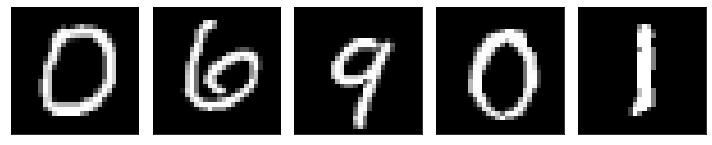

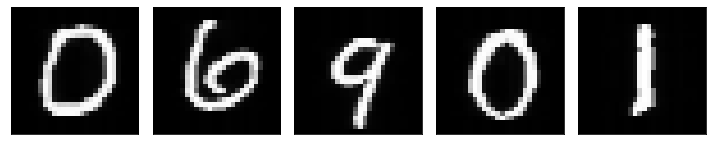

In [10]:
import matplotlib.pyplot as plt
batch_features = x_test[10:16]
reconstructed = autoencoder(tf.constant(batch_features))

x_test1 = tf.reshape(batch_features, (batch_features.shape[0], 28, 28))
pred = tf.reshape(reconstructed, (batch_features.shape[0], 28, 28))


plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(x_test1[i], cmap='gray') #display the image 
plt.tight_layout() # to have a proper space in the subplots
plt.show()

# to visualise reconstructed images(output of autoencoder)
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(pred[i], cmap='gray') #display the image 
plt.tight_layout() # to have a proper space in the subplots
plt.show()